In [1]:
import pandas as pd
from PIL import Image
from IPython.display import clear_output
import numpy as np

In [2]:
import os
os.chdir(r'C:\Users\latta\GitHub\Vision_Project\GeoEstimation\resources')

In [3]:
csv_file = "im2gps3k_places365.csv"
im_ds = pd.read_csv(csv_file)

In [24]:
im_ds[155]

IMG_ID          113861643_a1febd9dd0_45_87434398@N00.jpg
AUTHOR                                      87434398@N00
LAT                                              42.9299
LON                                             -72.5785
S3_Label                                               2
S16_Label                                             14
S365_Label                                           201
Prob_indoor                                     0.013387
Prob_natural                                   0.0751545
Prob_urban                                      0.911458
LOC                                                  NaN
Name: 155, dtype: object

In [5]:
im_ds.loc[0,'LOC']=0

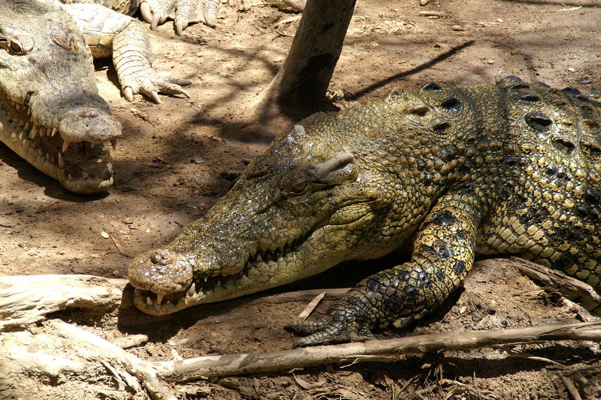

In [66]:
image = im_ds.loc[0]['IMG_ID']
path = "images/im2gps/{}".format(image)
view_im = Image.open(path)
view_im.thumbnail([800, 400])
display(view_im)

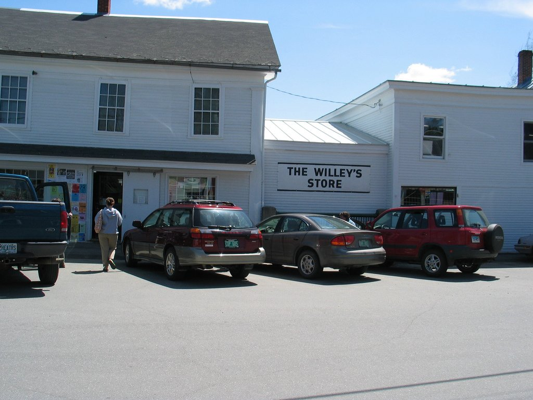

KeyboardInterrupt: Interrupted by user

In [7]:
for i in range(im_ds.shape[0]):
    if np.isnan(im_ds.loc[i,'LOC']):
        image = im_ds.loc[i]['IMG_ID']
        path = "images/im2gps3ktest/{}".format(image)
        view_im = Image.open(path)
        view_im.thumbnail([800, 400])
        display(view_im)
        localizzabile = input("Valore 0 non localizzabile, 2 localizzabile, 1 borderline: ")
        while localizzabile not in ['1','2','3','q']:
            input("deve essere 1,2 o 3! riprova: ")
        im_ds.loc[i,'LOC']=localizzabile
        clear_output(wait=True)

In [25]:
im_ds

,IMG_ID,AUTHOR,LAT,LON,S3_Label,S16_Label,S365_Label,Prob_indoor,Prob_natural,Prob_urban,LOC
0,1000269685_e60e9cdfb4_1125_78841376@N00.jpg,78841376@N00,32.325436,-64.764404,2,12,353,0.274242,0.045113,0.680645,0
1,1000304467_1a75a200b1_1296_78841376@N00.jpg,78841376@N00,32.325436,-64.764404,0,4,325,0.414407,0.220912,0.364681,1
2,1001048550_8e4b47d165_1051_78841376@N00.jpg,78841376@N00,32.325436,-64.764404,1,8,36,0.007326,0.969903,0.022771,0
3,1005977048_5ccf8b05d3_1201_91728102@N00.jpg,91728102@N00,29.976052,122.390356,2,6,273,0.003868,0.476665,0.519468,2
4,1008804117_ce4e6fef8a_1349_97522422@N00.jpg,97522422@N00,46.478536,30.758714,0,0,198,0.973878,0.002453,0.023670,0
...,...,...,...,...,...,...,...,...,...,...,...
2992,99078324_9d8e7a3975_28_44972214@N00.jpg,44972214@N00,32.759562,-117.180175,1,6,243,0.000374,0.966815,0.032811,NaN
2993,99101189_a518846673_43_50517642@N00.jpg,50517642@N00,12.500541,-70.010590,1,6,187,0.000523,0.981292,0.018185,NaN
2994,99115715_1bdd45ca71_19_50517642@N00.jpg,50517642@N00,12.564004,-70.051864,2,12,59,0.004710,0.315841,0.679449,NaN
2995,995674057_2360a67996_1182_98545448@N00.jpg,98545448@N00,51.682462,-1.786330,2,10,0,0.003548,0.160355,0.836097,NaN


In [26]:
# to save results on the csv file!
im_ds.to_csv(path_or_buf=csv_file, index=False, sep=',')

Come classificare le foto:
- classe 0:
    - luoghi,soggetti, oggetti privati (un piatto di pasta, una persona dentro, una stanza di albergo senza tratti particolari)
    - foto non rappresentati luoghi (foto di un disegno, di un volantino, ...)
    - foto in cui rimossi tutti gli oggetti mobili, la scena non ha nessun carattereo segno specifico (mare, deserto, pratone)
    - primi piani di cose generiche
    - foto sfocate

- classe 1:
    - tutto ciò che non è in 0 nè in 2
    - stadi, palestre, edifici molto comuni

- classe 2:
    - foto di monumenti, edifici, opere d'arte, paesaggi famosi
    - paesaggi e skylines ben definiti e con sufficiente variabilità (profilo di una montagna, )
    - foto di scritte non mobili (cartelli, insegne, lapidi)
    - foto urbane sufficientemente dettagliate, dettagli non motevoli, non monotone

